# Further data analysis

The outline of this notebook:

1. Import data
2. Explore artist data using the dataframes:
    * artists
    * atu_relationship
    * similar_artist
    * user_artist_w
3. Explore user data using the dataframes:
    * Pass
    * Pass

In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (24, 16)

from datetime import datetime
import tensorflow.compat.v1 as tf
from sklearn.model_selection import train_test_split

In [84]:
def plot_subjects(df,colName, title, xlabel, ylabel):   
    fontdict = {"fontsize":20}
    plt.barh(df.index, df[colName],)
    plt.title(title,fontdict)
    plt.ylabel(ylabel,fontdict)
    plt.xlabel(xlabel,fontdict)
    plt.show()

In [63]:
artist = pd.read_csv("data/processed_data/artist.csv")

In [64]:
atu = pd.read_csv("data/processed_data/atu_relationship.csv")

In [65]:
similar_artist = pd.read_csv("data/processed_data/similar_artist.csv")

In [106]:
user_artist_w = pd.read_csv("data/user_artists.dat", sep="\t")

In  the user_artist_w df, the weight refers to how much the user has listened to an artist.  
In the code below i find the top ten most listened to artists and present them in a barplot.

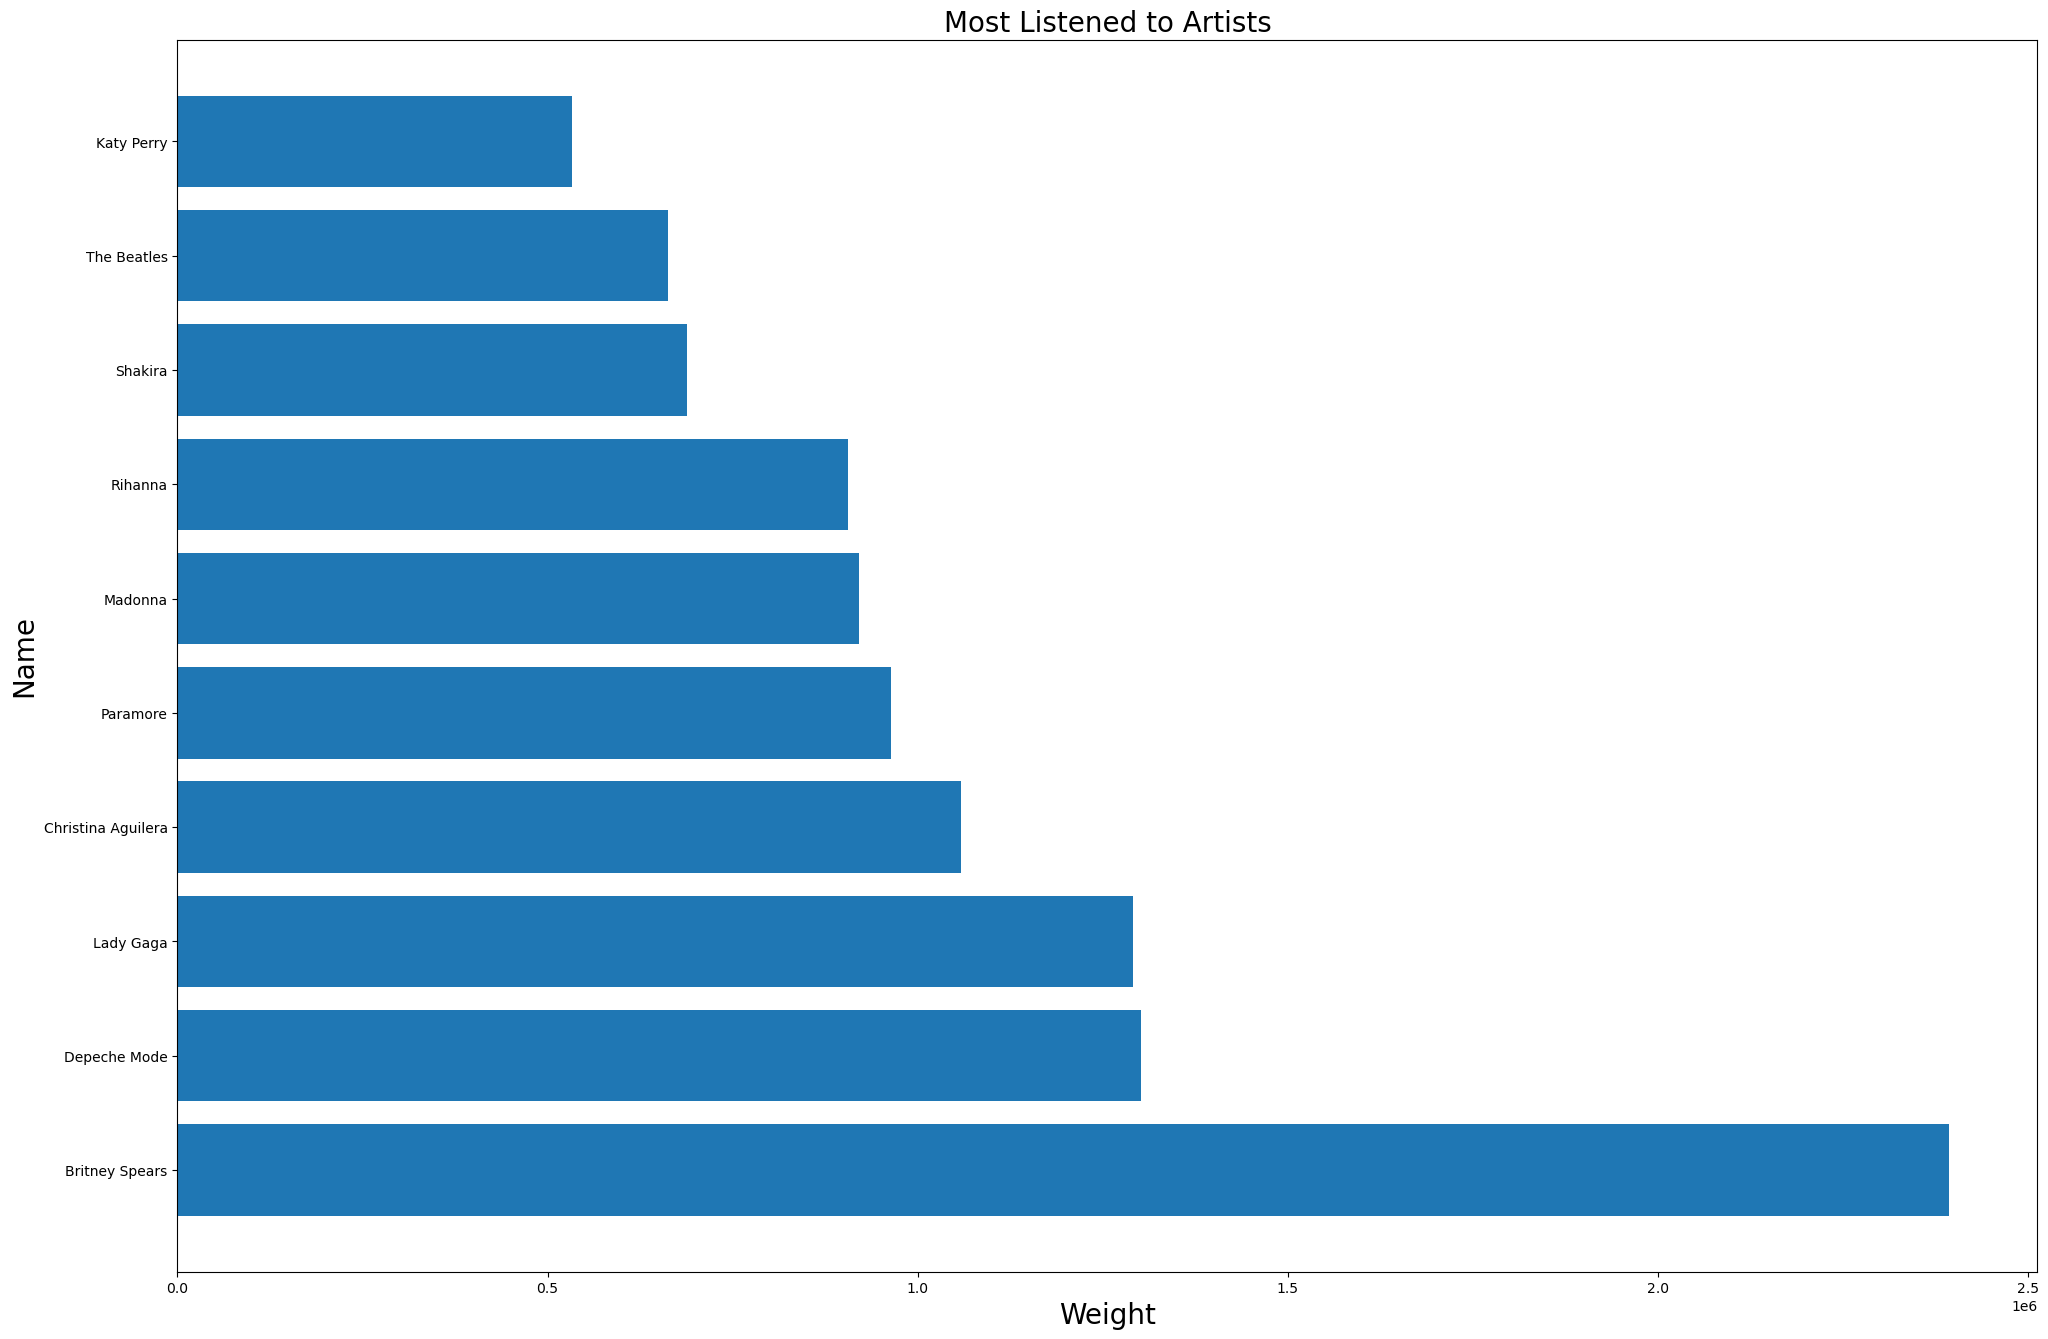

In [85]:
top_listened_artists = user_artist_w.groupby(
"artistID"
).sum(
)["weight"].sort_values(
ascending=False).head(10)

top_listened_artists_df = artist.set_index(
    "artistID").loc[top_listened_artists.index].set_index("name")

top_listened_artists_df["total_weight"] = top_listened_artists.values
plot_subjects(top_listened_artists_df,"total_weight", "Most Listened to Artists", "Weight", "Name")

In [90]:
user_artist_w_sparse = build_sparse(user_artist_w, ["userID","artistID"], "weight")

In [104]:
user_artist_w_sparse.indices[0]

<tf.Tensor: shape=(2,), dtype=int64, numpy=array([ 2, 51], dtype=int64)>

In [107]:
user_friend = pd.read_csv("data/user_friends.dat", sep="\t")

In [109]:
user_artist_w

,userID,artistID,weight
0,2,51,13883
1,2,52,11690
2,2,53,11351
3,2,54,10300
4,2,55,8983
...,...,...,...
92829,2100,18726,337
92830,2100,18727,297
92831,2100,18728,281
92832,2100,18729,280


In [108]:
user_friend

,userID,friendID
0,2,275
1,2,428
2,2,515
3,2,761
4,2,831
...,...,...
25429,2099,1801
25430,2099,2006
25431,2099,2016
25432,2100,586
